# Assignment
- Continue to predict New York City apartment rents. This is your last assignment with this dataset.
- You may select any number of features. You are encouraged to engineer new features.
- Get and plot your model's coefficients.
- Report your Root Mean Squared Error, Mean Absolute Error, and R^2 Score, for your Train and Test sets. Share your scores with your cohort on Slack!
- Fit a model with 2 features, and visualize the plane of best fit in 3D.
- Commit your notebook to your fork of the repo.

## Stretch Goals

Study more about Linear Regression. Here are two helpful links. If you find more links, share your favorites with your cohort on Slack.

1. Watch this 20 minute video that just hit 1 million views: Brandon Foltz, Statistics 101: Simple Linear Regression (https://www.youtube.com/watch?v=ZkjP5RJLQF4)
2. Skim _An Introduction to Statistical Learning_, Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression (http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)

In your 3D visualization, can you include the actual datapoints, like in [this notebook](https://nbviewer.jupyter.org/urls/s3.amazonaws.com/datarobotblog/notebooks/multiple_regression_in_python.ipynb)? Can you also include the residual lines from the datapoints to the plane of the best fit, like in _An Introduction to Statistical Learning?_ This would be hard to do, but awesome!


Can you get creative with feature engineering? Share with your cohort on Slack. We mentioned some feature ideas at the end of last lesson, but didn't demonstrate how to engineer them. So here are some example solutions:

```python
# Does apartment have a non-empty description?
df['description'] = df['description'].str.strip().fillna('')
df['has_description'] = df['description'] != ''

# How long is the description?
df['description_length'] = df['description'].str.len()

# How many total perks does each apartment have?
perk_cols = ['elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
             'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
             'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
             'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
             'swimming_pool', 'new_construction', 'exclusive', 'terrace', 
             'loft', 'garden_patio', 'common_outdoor_space', 
             'wheelchair_access']
df['perk_count'] = df[perk_cols].sum(axis=1)

# Are pets allowed?
df['pets_allowed'] = (df['cats_allowed']==1) | (df['dogs_allowed']==1)
```


In [0]:
!pip install category_encoders

In [0]:
import numpy as np
import pandas as pd
from math import sqrt
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [0]:
LOCAL = '../data/nyc/nyc-rent-2016.csv'
WEB = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/nyc/nyc-rent-2016.csv'

df = pd.read_csv(WEB)
assert df.shape == (48300, 34)

In [80]:
# Does apartment have a non-empty description?
df['description'] = df['description'].str.strip().fillna('')
df['has_description'] = df['description'] != ''

# How long is the description?
df['description_length'] = df['description'].str.len()

# How many total perks does each apartment have?
perk_cols = ['elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
             'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
             'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
             'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
             'swimming_pool', 'new_construction', 'exclusive', 'terrace', 
             'loft', 'garden_patio', 'common_outdoor_space', 
             'wheelchair_access']
df['perk_count'] = df[perk_cols].sum(axis=1)

# Are pets allowed?
df['pets_allowed'] = (df['cats_allowed']==1) | (df['dogs_allowed']==1)

# latitude * longitude
df['location'] = df['latitude'] * df['longitude']

# extract the month
df['created'] = pd.to_datetime(df['created'], infer_datetime_format=True)
df['month'] = df['created'].dt.month

df.interest_level = pd.Categorical(df.interest_level)
df['interest_code'] = df.interest_level.cat.codes
df.sample(5)

(31515, 41) (16785, 41) (48300, 41)


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,exclusive,terrace,loft,garden_patio,common_outdoor_space,wheelchair_access,month,has_description,description_length,perk_count,pets_allowed,interest_num,location
37446,1.0,2,2016-05-13 05:37:02,BEAUTIFUL LUXURY APARTMENT. MIDTOWN WEST. NO B...,W 54th St,40.7645,-73.9840,3500,260 W 54th St,medium,1,0,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,5,1,505,9,0,2,-3015.920768
42951,1.0,0,2016-04-06 02:17:28,The building is cat and dog friendly without s...,Remsen Street,40.6936,-73.9930,2300,150 Remsen Street,low,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,667,3,1,1,-3011.041545
5842,1.0,0,2016-04-28 05:43:14,ABSOLUTELY STUNNING STUDIO IN LUXURY DOORMAN B...,E 35th St,40.7466,-73.9779,2400,165 E 35th St,medium,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,788,4,0,2,-3014.347900
16081,1.0,1,2016-06-20 19:01:52,This top floor 1 bedroom is available for July...,298 New York Avenue,40.6702,-73.9479,2100,298 New York Avenue,low,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,462,1,0,1,-3007.475883
21743,1.0,2,2016-06-02 06:52:25,Amazing Building located at the center of Murr...,East 34th Street,40.7436,-73.9727,3300,401 East 34th Street,medium,1,0,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,6,1,684,10,0,2,-3013.914100


In [139]:
# use the month to select train and test sets
train = df.query('month < 6')
test = df.query('month == 6')
print(train.shape, test.shape, df.shape)
df.sample(5)

(31515, 42) (16785, 42) (48300, 42)


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,exclusive,terrace,loft,garden_patio,common_outdoor_space,wheelchair_access,month,has_description,description_length,perk_count,pets_allowed,interest_num,location,interest_code
16971,2.0,2,2016-06-09 10:09:18,"-1 BR, Flex 2, 1.5 Bathroom apartment in the c...",Duane Street,40.7158,-74.0059,5499,105 Duane Street,low,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,1,671,7,1,1,-3013.209423,1
28384,2.0,2,2016-05-19 05:55:18,Ultra luxury high-rise located in prime midtow...,West 42nd Street,40.7590,-73.9949,6000,460 West 42nd Street,low,1,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,5,1,1260,13,0,1,-3015.958129,1
6710,1.5,2,2016-04-15 02:57:37,These pictures are from a similarlisting.,W 69th St,40.7751,-73.9787,3880,35 W 69th St,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,1,41,1,0,1,-3016.488890,1
46155,1.0,2,2016-04-30 05:37:40,[THE APT]-BEAUTIFULLY RENOVATED BUILDING IN GR...,East 29th Street,40.7412,-73.9772,3300,340 East 29th Street,low,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,475,4,0,1,-3013.919901,1
38292,1.0,1,2016-05-18 02:22:23,Prewar brownstone building located quiet tree ...,W 89 St.,40.7876,-73.9694,2900,40 W 89 St.,low,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,360,4,0,1,-3017.034299,1


In [102]:
# Convert values numerically
df['interest_num'] = df['interest_level'].map({'low': 1, 'medium': 2, 'high': 3})
df['has_description'] = df['has_description'].map({False: 0, True: 1})
df['pets_allowed'] = df['pets_allowed'].map({False: 0, True: 1})

features = df.drop('price', axis=1).select_dtypes(include=np.number).columns
feature_data = []
model = LinearRegression()
for first in range(len(features)):
  for x in range(1,len(features[first:])):
    target = 'price'
    X_train = train[[features[first], features[first+x]]]
    y_train = train[target]
    X_test = test[[features[first], features[first+x]]]
    y_test = test[target]
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    MAE_test = mean_absolute_error(y_test, y_test_pred)
    RMSE_test = sqrt(mean_squared_error(y_test, y_test_pred))
    R2_test = r2_score(y_test, y_test_pred)
    MAE_train = mean_absolute_error(y_train, y_train_pred)
    RMSE_train = sqrt(mean_squared_error(y_train, y_train_pred))
    R2_train = r2_score(y_train, y_train_pred)
    feature_data.append([features[first], features[first+x], MAE_test, 
                         RMSE_test, R2_test, MAE_train, RMSE_train, R2_train])
    
df_features = pd.DataFrame(feature_data,columns=[
    'feature_1','feature_2', 'MAE_test', 'RMSE_test', 
    'R2_test', 'MAE_train', 'RMSE_train', 'R2_train'])
df_features.describe()

,MAE_test,RMSE_test,R2_test,MAE_train,RMSE_train,R2_train
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,1006.346961,1346.780057,0.080143,1007.761870,1337.963524,0.080701
std,66.241233,83.818436,0.106195,70.958026,87.374827,0.110934
min,751.901602,1016.636686,-0.001552,738.116583,1001.315212,0.000384
25%,1000.821808,1341.574927,0.018226,1010.538565,1336.519673,0.016187
50%,1027.742233,1372.202869,0.048766,1030.912715,1367.156600,0.044216
75%,1044.622268,1394.056534,0.090755,1047.410303,1387.058458,0.086573
max,1070.084922,1408.027783,0.477865,1055.673955,1398.154097,0.487298


In [105]:
df_features.sort_values(['MAE_test'], ascending=[True]).head()

,feature_1,feature_2,MAE_test,RMSE_test,R2_test,MAE_train,RMSE_train,R2_train
2,bathrooms,longitude,751.901602,1016.636686,0.477865,742.473039,1001.315212,0.487298
0,bathrooms,bedrooms,754.550872,1032.492455,0.461452,738.116583,1009.790959,0.478582
35,bedrooms,longitude,767.963607,1080.471000,0.410238,749.746564,1047.294581,0.439132
40,bedrooms,doorman,782.843429,1084.154936,0.406209,769.060501,1061.370455,0.423954
7,bathrooms,doorman,783.257415,1059.396144,0.433020,779.694004,1048.348110,0.438003


In [26]:
# OneHotEncoder
features = ['interest_level','bathrooms','bedrooms','elevator',
            'hardwood_floors','dogs_allowed','doorman','dishwasher',
            'fitness_center','laundry_in_unit','roof_deck','high_speed_internet',
            'new_construction','exclusive','terrace','dining_room',
            'laundry_in_building','pre-war','longitude','swimming_pool',
            'outdoor_space','wheelchair_access']
# ,'cats_allowed','loft','latitude'
target = 'price'
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Test MAE: ', mean_absolute_error(y_test, y_pred))
print('Test RMSE: ', sqrt(mean_squared_error(y_test, y_pred)))
print('Test R^2: ', r2_score(y_test, y_pred))
coe, inter = model.coef_, model.intercept_
print('Intercept: ', inter)
print('Coefficients: \n', coe)

Test MAE:  592.0139684376495
Test RMSE:  844.6455211060558
Test R^2:  0.639587518237809
Intercept:  -909452.6269896484
Coefficients: 
 [  -371.3344433    1211.27678137    507.55271465    188.73226991
   -141.96933022     56.42239481    380.40727737     92.57327548
     70.2794566     353.35186065   -130.99030119   -262.24778588
   -169.3125075      52.51281242     94.53228664     88.29518494
   -175.8053109     -89.64005223 -12309.6189328      32.9059727
    -81.14648001    118.17208684]


Test MAE:  590.7057739596826
Coefficients:  [ 518.51777586  556.2988661    94.08301297  -68.60288708   27.7748299
  187.91888149   46.78784365   30.81890798  132.07681801  -43.29210258
  -73.68957384  -36.57306413   10.06840238   19.34544505   26.26434183
  -40.63776502  -34.61202661 -365.36624733    7.52277931  -27.52179306
   18.56290417 -233.00493802  -37.45516885]


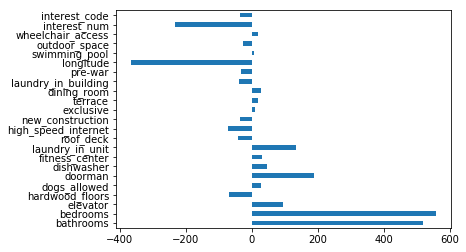

In [140]:
# OneHotEncoder & StandardScaler

features = ['bathrooms','bedrooms','elevator',
            'hardwood_floors','dogs_allowed','doorman','dishwasher',
            'fitness_center','laundry_in_unit','roof_deck','high_speed_internet',
            'new_construction','exclusive','terrace','dining_room',
            'laundry_in_building','pre-war','longitude','swimming_pool',
            'outdoor_space','wheelchair_access','interest_num','interest_code']
target = 'price'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

# encoder = ce.OneHotEncoder(use_cat_names=True)
# X_train_encoded = encoder.fit_transform(X_train)
# X_test_encoded = encoder.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test_scaler)

print('Test MAE: ', mean_absolute_error(y_test, y_pred))
print('Coefficients: ', model.coef_)
pd.Series(model.coef_, X_test.columns).plot.barh()

In [0]:
X_test_encoded

## Visualize hyperplane of best fit in 3D

In [120]:
# TODO
from sklearn.linear_model import LinearRegression
model = LinearRegression()

features = ['bathrooms','longitude']
target = 'price'
X = df[features]
y = df[target]

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# https://stackoverflow.com/a/47230966
# Plotly notebook mode with google colaboratory
# You need to define this function
# And call it in each offline plotting cell

def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [117]:
import itertools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

def viz3D(fitted_model, X, features, target='', num=100):
    """
    Visualize model predictions in 3D, for regression model fit on 2 features
    
    Parameters
    ----------
    fitted_model : scikit-learn model, already fitted
    X : pandas dataframe, which was used to fit model
    features : list of strings, column names of the 2 features
    target : string, name of target
    num : int, number of grid points for each feature
    
    References
    ----------
    https://plot.ly/python/3d-charts/
    """
    feature1, feature2 = features
    min1, max1 = X[feature1].min(), X[feature1].max()
    min2, max2 = X[feature2].min(), X[feature2].max()
    x1 = np.linspace(min1, max1, num)
    x2 = np.linspace(min2, max2, num)
    combos = list(itertools.product(x1, x2))
    Z = fitted_model.predict(combos).reshape(num, num)
    
    configure_plotly_browser_state()
    data = [go.Surface(x=x1, y=x2, z=Z)]
    layout = go.Layout(
        scene={'xaxis': {'title': feature1, 'range': [min1,max1], 'showticklabels': True}, 
               'yaxis': {'title': feature2, 'range': [min2,max2], 'showticklabels': True}, 
               'zaxis': {'title': target, 'showticklabels': True}}, 
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [121]:
# TODO
print('Coefficients: ', model.coef_)
viz3D(model, X, features, target)

Coefficients:  [  2040.66015343 -14257.20170791]
